### Data Cleaning

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
titanic = pd.read_csv("/home/thetwumasi/Desktop/workdev/Titanic_Survival_Prediction_Analysis/The Titanic dataset.csv")

the_titanic = pd.read_csv("/home/thetwumasi/Desktop/workdev/Titanic_Survival_Prediction_Analysis/The Titanic dataset.csv")
# the_titanic = pd.read_csv("../datasets/The Titanic dataset.csv", header=1)


the_titanic.head(10)



,1,2,3,4,5,6,7,8,9,10
0,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
3,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
4,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90
5,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90
6,5,3,1,"Abelseth, Miss. Karen Marie",female,16,0,7.65,S,05-Jan-90
7,6,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25,0,7.65,S,06-Jan-90
8,7,2,0,"Abelson, Mr. Samuel",male,30,1,24,C,07-Jan-90
9,8,2,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,24,C,08-Jan-90


In [157]:
the_titanic.columns = the_titanic.iloc[0]
the_titanic_df= the_titanic[1:].reset_index(drop=True)
the_titanic_df


,sn,pclass,survived,NaN,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90
...,...,...,...,...,...,...,...,...,...,...
1296,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24,0,13,S,19-Jul-93
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1,14.4542,C,20-Jul-93
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,7.225,C,21-Jul-93
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27,0,7.225,C,22-Jul-93


In [158]:
the_titanic_df.rename(columns={the_titanic.columns[3]: 'name'}, inplace=True)
# the_titanic['date'] = pd.to_datetime(the_titanic['date'])
the_titanic_df.drop_duplicates(inplace=True)
the_titanic_df

,sn,pclass,survived,name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2,20.25,S,04-Jan-90
5,5,3,1,"Abelseth, Miss. Karen Marie",female,16,0,7.65,S,05-Jan-90
...,...,...,...,...,...,...,...,...,...,...
1296,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24,0,13,S,19-Jul-93
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1,14.4542,C,20-Jul-93
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,7.225,C,21-Jul-93
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27,0,7.225,C,22-Jul-93


In [159]:
the_titanic_df[['sn', 'pclass', 'survived', 'age', 'family', 'fare']].describe()
the_titanic_df.describe()

,sn,pclass,survived,name,gender,age,family,fare,embarked,date
count,1300,1300,1300,1300,1299,1043,1298,1298,1295,1300
unique,1300,3,2,1297,2,97,9,282,3,1300
top,1,3,0,"Abbott, Mr. Rossmore Edward",male,24,0,13,S,01-Jan-90
freq,1,699,800,2,834,47,780,59,905,1


In [160]:
non_numeric_values = pd.to_numeric(the_titanic_df['age'], errors='coerce')
the_titanic_df['age'] = non_numeric_values

mean_age = int(the_titanic_df['age'].mean())
the_titanic_df['age'] = the_titanic_df['age'].fillna(mean_age)
the_titanic_df

,sn,pclass,survived,name,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42.0,0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,29.0,2,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,29.0,2,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35.0,2,20.25,S,04-Jan-90
5,5,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,7.65,S,05-Jan-90
...,...,...,...,...,...,...,...,...,...,...
1296,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,13,S,19-Jul-93
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1,14.4542,C,20-Jul-93
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,7.225,C,21-Jul-93
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27.0,0,7.225,C,22-Jul-93


In [161]:
df = the_titanic_df.drop_duplicates('name')


In [162]:
non_numeric_values_fare = pd.to_numeric(the_titanic_df['fare'], errors='coerce')
the_titanic_df['fare'] = non_numeric_values_fare
mean_fare = int(the_titanic_df['fare'].mean())

the_titanic_df['fare'] = the_titanic_df['fare'].fillna(mean_fare)
the_titanic_df['gender'] = the_titanic_df['gender'].fillna("male")

mode_embark = the_titanic_df['embarked'].mode()
the_titanic_df['embarked'] = the_titanic_df['embarked'].fillna(mode_embark)
the_titanic_df



non_numeric_values_fam = pd.to_numeric(the_titanic_df['family'], errors='coerce')
the_titanic_df['family'] = non_numeric_values_fam
mode_family = the_titanic_df['family'].mode()
the_titanic_df['family'] = the_titanic_df['family'].fillna(mode_family)

In [163]:
the_titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sn        1300 non-null   object 
 1   pclass    1300 non-null   object 
 2   survived  1300 non-null   object 
 3   name      1300 non-null   object 
 4   gender    1300 non-null   object 
 5   age       1300 non-null   float64
 6   family    1298 non-null   float64
 7   fare      1300 non-null   float64
 8   embarked  1296 non-null   object 
 9   date      1300 non-null   object 
dtypes: float64(3), object(7)
memory usage: 111.7+ KB


In [164]:
the_titanic_df['embarked'].value_counts(dropna=False)

embarked
S      906
C      267
Q      123
NaN      4
Name: count, dtype: int64

In [165]:
the_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sn        1300 non-null   object 
 1   pclass    1300 non-null   object 
 2   survived  1300 non-null   object 
 3   name      1300 non-null   object 
 4   gender    1300 non-null   object 
 5   age       1300 non-null   float64
 6   family    1298 non-null   float64
 7   fare      1300 non-null   float64
 8   embarked  1296 non-null   object 
 9   date      1300 non-null   object 
dtypes: float64(3), object(7)
memory usage: 111.7+ KB


### EXPLORATORY DATA ANALYSIS

# Titanic Basic Analysis

This feature provides a basic analysis of the the dataset
1.  Visualization of age distribution among Titanic passengers.
2.  Examination of gender-based distribution across passenger classes.
3.  Analysis of survival rates across different passenger classes.

In [166]:
the_titanic_df.describe()

,age,family,fare
count,1300.000000,1298.000000,1300.000000
mean,29.775323,0.890601,33.481048
std,12.867069,1.588428,51.875906
min,0.170000,0.000000,0.000000
25%,22.000000,0.000000,7.895800
50%,29.000000,0.000000,14.458300
75%,35.000000,1.000000,31.387500
max,80.000000,10.000000,512.329200


In [167]:
#finding info from categorical data
the_titanic_df.describe(include=['O'])

,sn,pclass,survived,name,gender,embarked,date
count,1300,1300,1300,1300,1300,1296,1300
unique,1300,3,2,1297,2,3,1300
top,1,3,0,"Abbott, Mr. Rossmore Edward",male,S,01-Jan-90
freq,1,699,800,2,835,906,1


In [168]:
the_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sn        1300 non-null   object 
 1   pclass    1300 non-null   object 
 2   survived  1300 non-null   object 
 3   name      1300 non-null   object 
 4   gender    1300 non-null   object 
 5   age       1300 non-null   float64
 6   family    1298 non-null   float64
 7   fare      1300 non-null   float64
 8   embarked  1296 non-null   object 
 9   date      1300 non-null   object 
dtypes: float64(3), object(7)
memory usage: 111.7+ KB


In [169]:
# Save the cleaned and explored dataset to a CSV file in the working directory
the_titanic_df.to_csv('/home/thetwumasi/Desktop/workdev/Titanic_Survival_Prediction_Analysis/cleaned_and_explored_titanic_data.csv', index=False)

print("Cleaned and explored dataset saved as 'cleaned_and_explored_titanic_data.csv' in the working directory.")

Cleaned and explored dataset saved as 'cleaned_and_explored_titanic_data.csv' in the working directory.


#Exploring The Relationship Between Features and Survival

In [170]:
the_titanic_df['survived'] = pd.to_numeric(the_titanic_df['survived'], errors='coerce')

In [171]:
the_titanic_df.groupby(['pclass'], as_index=False)['survived'].mean()

,pclass,survived
0,1,0.619195
1,2,0.428058
2,3,0.258941


In [172]:
the_titanic_df.groupby(['gender'], as_index=False)['survived'].mean()

,gender,survived
0,female,0.729032
1,male,0.192814


In [173]:
the_titanic_df.groupby(['fare'], as_index=False)['survived'].mean()

,fare,survived
0,0.0000,0.117647
1,3.1708,1.000000
2,4.0125,0.000000
3,5.0000,0.000000
4,6.2375,0.000000
...,...,...
276,227.5250,0.600000
277,247.5208,0.666667
278,262.3750,0.857143
279,263.0000,0.666667


In [174]:
the_titanic_df.groupby(['age'], as_index=False)['survived'].mean()

,age,survived
0,0.17,1.000000
1,0.67,1.000000
2,0.75,0.666667
3,0.83,1.000000
4,0.92,1.000000
...,...,...
91,70.50,0.000000
92,71.00,0.000000
93,74.00,0.000000
94,76.00,1.000000


In [175]:
the_titanic_df.groupby(['sn'], as_index=False)['survived'].mean()


,sn,survived
0,1,0.0
1,10,1.0
2,100,1.0
3,1000,0.0
4,1001,1.0
...,...,...
1295,995,0.0
1296,996,0.0
1297,997,1.0
1298,998,0.0


#### Visualization of Findings from Analysis

#### passenger class average survival rate

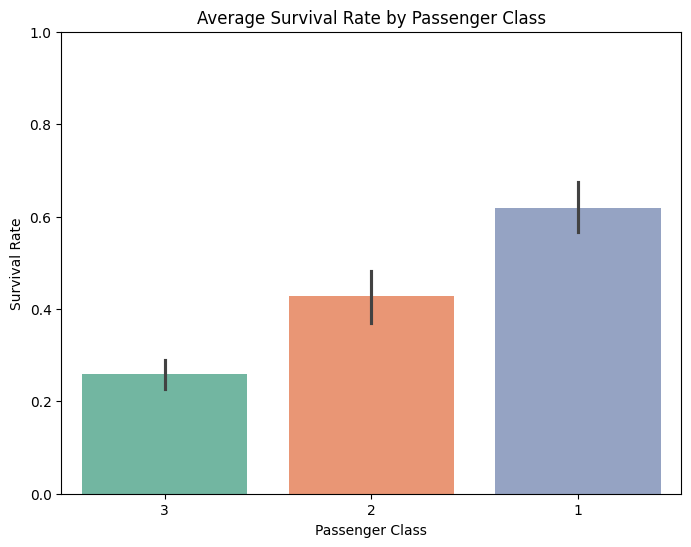

In [176]:
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=the_titanic_df, hue='pclass', palette='Set2')   
plt.title('Average Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0, 1)
plt.show()

#### average survival rate of gender distribution

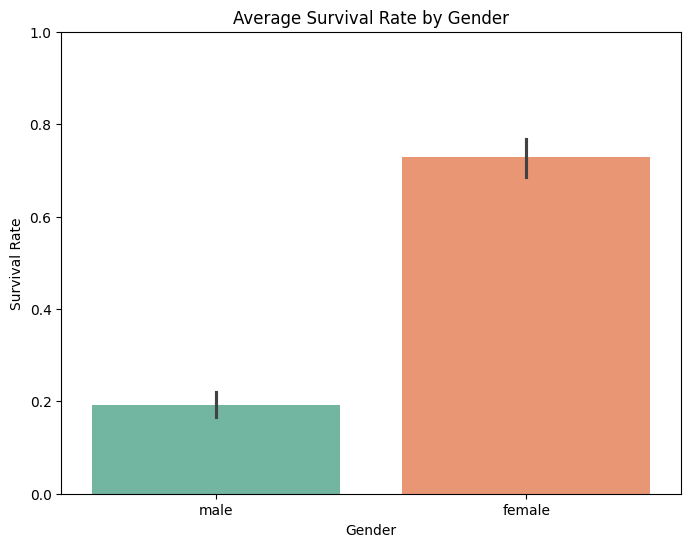

In [177]:
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='survived', data=the_titanic_df, hue='gender', palette='Set2')
plt.title('Average Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()

#### Average Survival Rate by Age

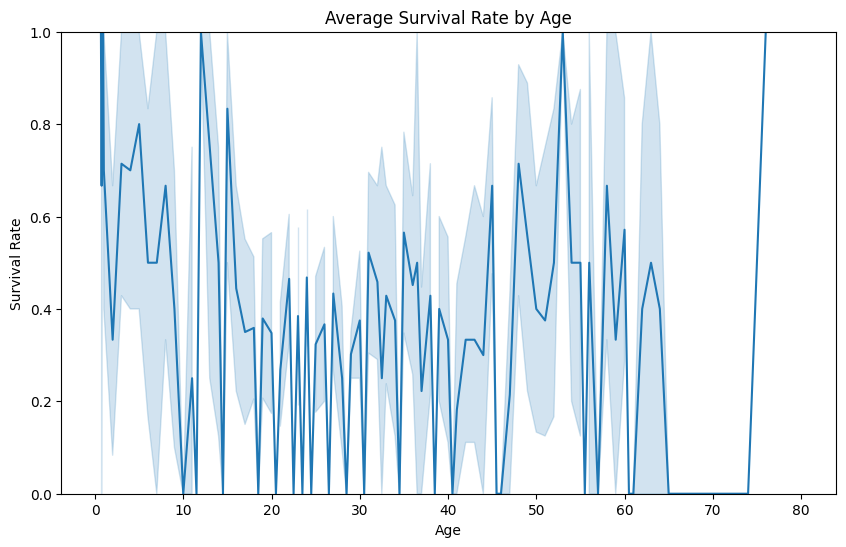

In [178]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='survived', data=the_titanic_df,)
plt.title('Average Survival Rate by Age')
plt.ylabel('Survival Rate')
plt.xlabel('Age')
plt.ylim(0, 1)
plt.show()

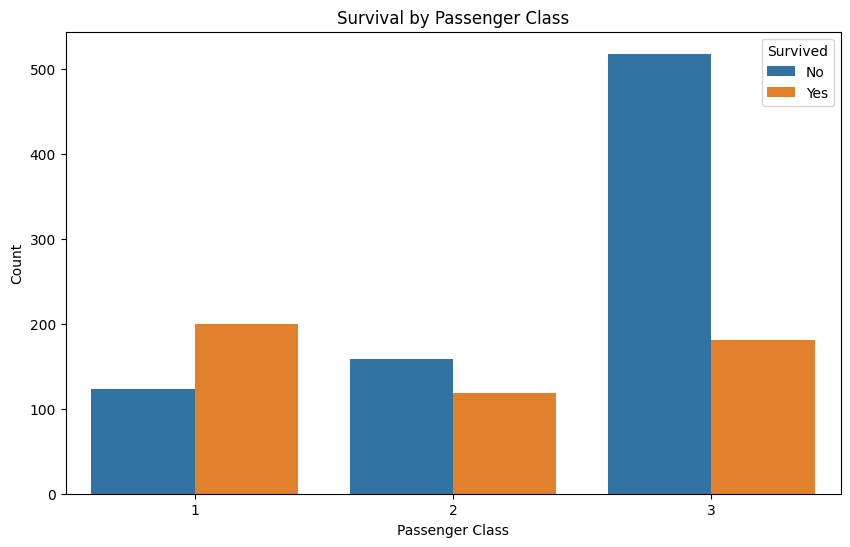

In [179]:
plt.figure(figsize=(10, 6))
sns.countplot(data=the_titanic_df, x='pclass', hue='survived', order=[1, 2, 3])
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

#### heat map of relevant features..numerical values

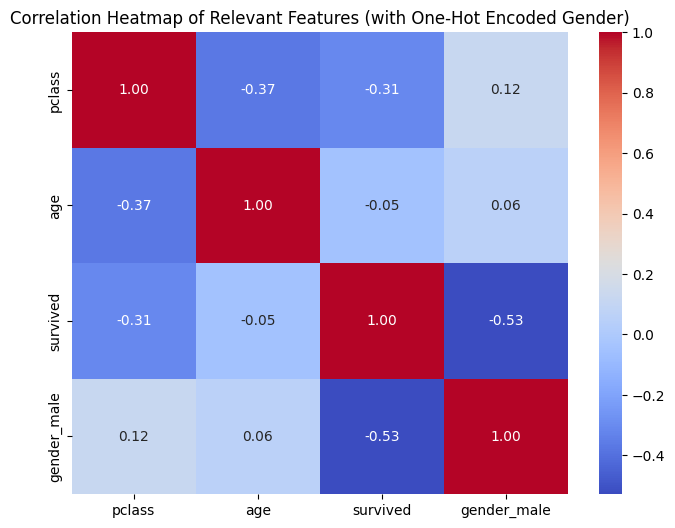

In [180]:
relevant_features = ['pclass', 'age', 'gender', 'survived']
data = the_titanic_df[relevant_features].copy()
data = pd.get_dummies(data, columns=['gender'], drop_first=True)
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Relevant Features (with One-Hot Encoded Gender)')
plt.show()

### Machine Learning Integration

### going to explore various models and select the most promising of them

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Selecting relevant features/ columns from dataframe to make model simpler and efficient

In [182]:

data = the_titanic_df[relevant_features].copy()

#### splitting of dataset into test and training data

In [183]:
X = data.drop('survived', axis=1)
y = data['survived']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#### define models for selection

In [184]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
}

# Train, predict, and evaluate
for model_name, model in models.items():
    print(f"Model: {model_name}")
    
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}\n")



Model: Logistic Regression
Accuracy: 0.8123076923076923
Precision: 0.7796610169491526
Recall: 0.7244094488188977
F1-Score: 0.7510204081632653

Model: Decision Tree
Accuracy: 0.7815384615384615
Precision: 0.7857142857142857
Recall: 0.6062992125984252
F1-Score: 0.6844444444444444

Model: Random Forest
Accuracy: 0.7907692307692308
Precision: 0.7478991596638656
Recall: 0.7007874015748031
F1-Score: 0.7235772357723578

Model: Support Vector Machine
Accuracy: 0.6246153846153846
Precision: 0.6190476190476191
Recall: 0.10236220472440945
F1-Score: 0.17567567567567569



In [185]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

X = data.drop('survived', axis=1)
y = data['survived']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


X_train = X_train.fillna(0) 
X_train = np.array(X_train)  
y_train = np.array(y_train) 


xgb_model = XGBClassifier(eval_metric='logloss', tree_method='auto')

xgb_model.fit(X_train, y_train)

print("XGBoost model trained successfully!")

XGBoost model trained successfully!


In [186]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = xgb_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 0.78
Precision: 0.78
Recall: 0.63
F1 Score: 0.70

Confusion Matrix:
[[175  23]
 [ 47  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       198
           1       0.78      0.63      0.70       127

    accuracy                           0.78       325
   macro avg       0.78      0.76      0.76       325
weighted avg       0.78      0.78      0.78       325

